In [722]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import configparser

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix


pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [723]:
config = configparser.ConfigParser()
config.sections()
config.read('config.ini')

bp_file =config['DEFAULT']['Vitals']
bp_file_p =config['DEFAULT']['Vitals_p']

In [724]:
data_pd = pd.read_csv(bp_file, sep='|')
#data_pd['WeightYear'] = data_pd['WeightYear'].astype('category')
#data_pd['HeightYear'] = data_pd['HeightYear'].astype('category')
#data_pd['BMIYear'] = data_pd['BMIYear'].astype('category')

In [725]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(149216, 6157)

In [726]:
data_pd.head()

,Deidentified_Pat_ID,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
0,MNGVDHTH,2700.8,2019.0,28.54,2019.0,64.50,2019.0
1,MNGVDHTH,2688.0,2019.0,NaN,NaN,NaN,NaN
2,MNOZVONA,3609.6,2018.0,NaN,NaN,NaN,NaN
3,MNOZVONA,3798.4,2018.0,31.98,2018.0,72.25,2018.0
4,MNOGADHT,3532.8,2019.0,NaN,NaN,NaN,NaN


In [727]:
data_pd.describe()

,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
count,148064.000000,148524.000000,61206.000000,61240.000000,62755.000000,62945.000000
mean,3154.165605,2016.603391,31.221951,2016.367342,66.904205,2016.355723
std,798.711721,1.486311,39.531164,1.485234,3.812227,1.484317
min,185.600000,2013.000000,2.480000,2014.000000,5.250000,2014.000000
25%,2592.000000,2015.000000,25.870000,2015.000000,64.000000,2015.000000
50%,3059.210000,2017.000000,29.750000,2016.000000,66.500000,2016.000000
75%,3600.000000,2018.000000,34.570000,2018.000000,69.500000,2018.000000
max,23580.800000,2019.000000,5378.200000,2019.000000,97.700000,2019.000000


In [728]:
weight_null = data_pd['Weight'].isna().mean()
weight_null

0.007720351704911001

In [729]:
len(data_pd[data_pd['Weight'].isna()])/len(data_pd)

0.007720351704911001

In [730]:
len(data_pd[data_pd['Weight'].notna()])

148064

In [731]:
len(data_pd[data_pd['WeightYear'].notna()])/len(data_pd)

0.9953624276217028

In [732]:
len(data_pd[data_pd['Height'].notna()])/len(data_pd)

0.4101838944885267

In [733]:
len(data_pd[data_pd['BMI'].isna()])/len(data_pd)

0.5794351812138109

In [734]:
len(data_pd[data_pd['Weight'].notna()])/len(data_pd)

0.992279648295089

In [735]:
pd.Series(data_pd["WeightYear"].tolist()).sort_values().unique()

array([2013., 2014., 2015., 2016., 2017., 2018., 2019.,   nan])

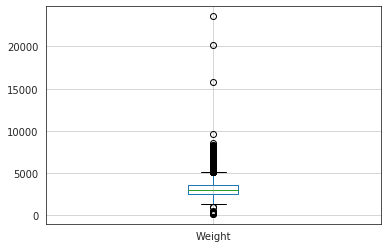

In [736]:
data_pd.boxplot(column=['Weight'])

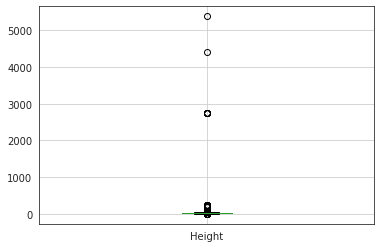

In [737]:
data_pd.boxplot(column=['Height'])

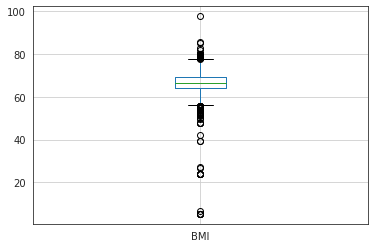

In [738]:
data_pd.boxplot(column=['BMI'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3adc6d9828>,
      dtype=object)

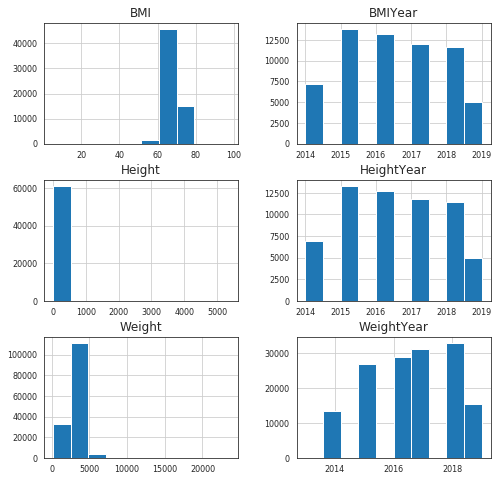

In [739]:
data_pd.hist(xlabelsize=8,ylabelsize=8,figsize=(8,8))

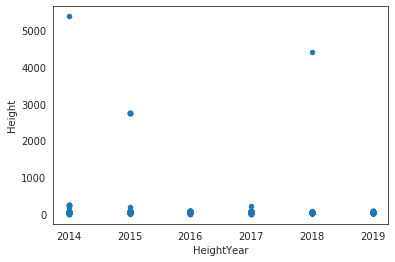

In [740]:
data_pd.plot.scatter(y='Height', x='HeightYear')

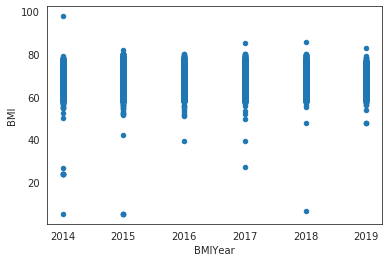

In [741]:
data_pd.plot.scatter(y='BMI', x='BMIYear')

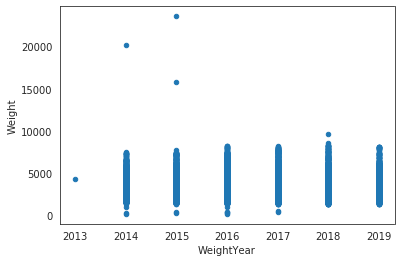

In [742]:
data_pd.plot.scatter(y='Weight', x='WeightYear')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3add167668>,
      dtype=object)

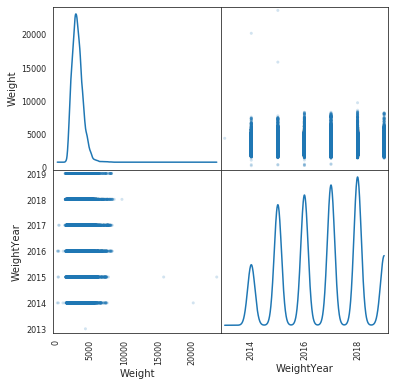

In [743]:
scatter_matrix(data_pd[['Weight','WeightYear']], alpha=0.2, figsize=(6, 6), diagonal='kde')

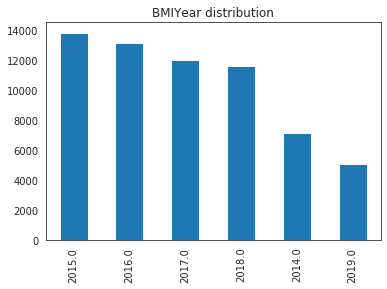

In [744]:
data_pd['BMIYear'].value_counts().plot(kind='bar', title="BMIYear distribution")

In [745]:
#ts = data_pd.cumsum()
#ts.plot()

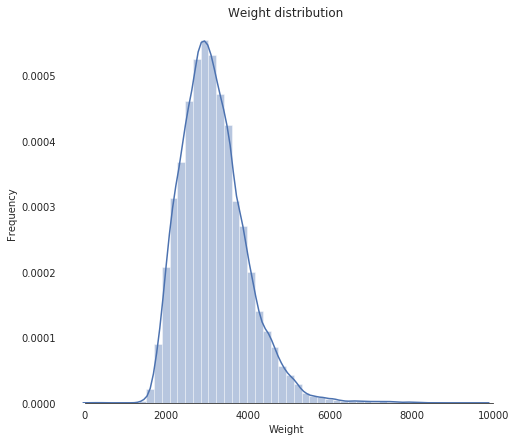

In [746]:
weight_pd = data_pd[data_pd['Weight'].notna()]
weight_pd1 = data_pd[(data_pd['Weight'].notna())&(data_pd['Weight']<10000)]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(weight_pd1['Weight'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Weight")
ax.set(title="Weight distribution")
sns.despine(trim=True, left=True)
plt.show()

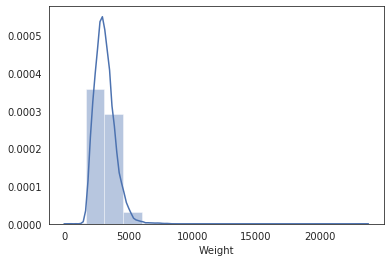

In [747]:
sns.distplot(weight_pd["Weight"], bins=16, color="b")

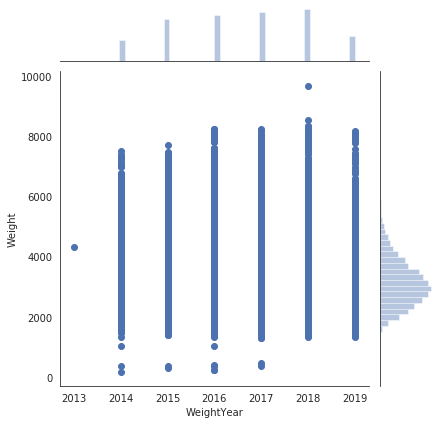

In [748]:
sns.jointplot(y = "Weight", x = "WeightYear", data = weight_pd1, color="b")

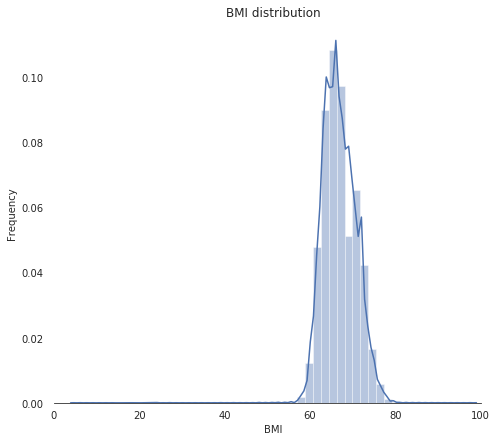

In [749]:
weight_pd = data_pd[data_pd['BMI'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(weight_pd['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

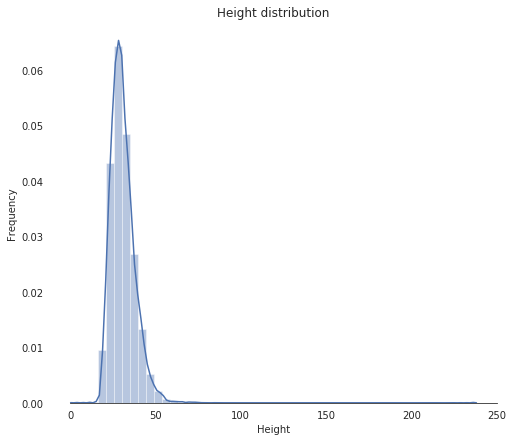

In [750]:
weight_pd = data_pd[(data_pd['Height'].notna())&(data_pd['Height']<1000)]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(weight_pd['Height'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Height")
ax.set(title="Height distribution")
sns.despine(trim=True, left=True)
plt.show()

In [751]:
data_pd.head()

,Deidentified_Pat_ID,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
0,MNGVDHTH,2700.8,2019.0,28.54,2019.0,64.50,2019.0
1,MNGVDHTH,2688.0,2019.0,NaN,NaN,NaN,NaN
2,MNOZVONA,3609.6,2018.0,NaN,NaN,NaN,NaN
3,MNOZVONA,3798.4,2018.0,31.98,2018.0,72.25,2018.0
4,MNOGADHT,3532.8,2019.0,NaN,NaN,NaN,NaN


In [752]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(data_pd)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('Height', 58.98),
 ('HeightYear', 58.96),
 ('BMI', 57.94),
 ('BMIYear', 57.82),
 ('Weight', 0.77),
 ('WeightYear', 0.46),
 ('Deidentified_Pat_ID', 0.0)]

In [753]:
len(data_pd[data_pd['Height'].isna()])/len(data_pd),len(data_pd[data_pd['BMI'].isna()])/len(data_pd),len(data_pd[data_pd['Weight'].isna()])/len(data_pd)

(0.5898161055114733, 0.5794351812138109, 0.007720351704911001)

In [754]:
data_pd.shape

(149216, 7)

In [755]:
data_pd.describe()

,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
count,148064.000000,148524.000000,61206.000000,61240.000000,62755.000000,62945.000000
mean,3154.165605,2016.603391,31.221951,2016.367342,66.904205,2016.355723
std,798.711721,1.486311,39.531164,1.485234,3.812227,1.484317
min,185.600000,2013.000000,2.480000,2014.000000,5.250000,2014.000000
25%,2592.000000,2015.000000,25.870000,2015.000000,64.000000,2015.000000
50%,3059.210000,2017.000000,29.750000,2016.000000,66.500000,2016.000000
75%,3600.000000,2018.000000,34.570000,2018.000000,69.500000,2018.000000
max,23580.800000,2019.000000,5378.200000,2019.000000,97.700000,2019.000000


In [756]:
weight_pd = data_pd[['Deidentified_Pat_ID','Weight','WeightYear']]
weight_pd.shape

(149216, 3)

In [757]:
weight_pd = weight_pd[(weight_pd['Weight'].notna())&(data_pd['WeightYear'].notna())]
weight_pd.shape

(148064, 3)

In [758]:
check_weight_pd = weight_pd[weight_pd['Deidentified_Pat_ID']=='MGVNDNAK']
check_weight_pd

,Deidentified_Pat_ID,Weight,WeightYear
147204,MGVNDNAK,2848.0,2019.0
147205,MGVNDNAK,2896.0,2019.0


In [759]:
from collections import Counter
 
def detect_outliers(df,n,features):
 
    outlier_indices = []
 
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        print('Q1',Q1)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        print('Q3',Q3)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        print('IQR',IQR)
 
        # outlier step
        outlier_step = 1.5 * IQR
        print('outlier_step',outlier_step)
        
        print('Q1 - outlier_step',Q1 - outlier_step)
        print('Q3 + outlier_step',Q3 + outlier_step)
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
 
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
 
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    print('outliers:',len(outlier_indices))
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
 
    return multiple_outliers

In [760]:
Outliers_to_drop = detect_outliers(weight_pd,0,["Weight"])
len(Outliers_to_drop)

Q1 2592.0
Q3 3600.0
IQR 1008.0
outlier_step 1512.0
Q1 - outlier_step 1080.0
Q3 + outlier_step 5112.0
outliers: 2664


2664

In [761]:
len(weight_pd[weight_pd['Weight']>5112])

2652

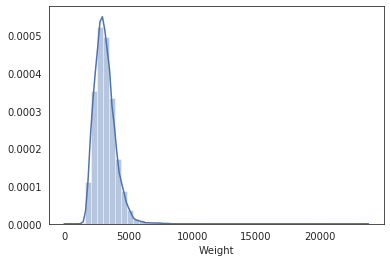

In [762]:
sns.distplot(weight_pd['Weight'], color="b");

In [763]:
# Drop outliers
weight_pd_clean = weight_pd.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
len(weight_pd_clean)

145400

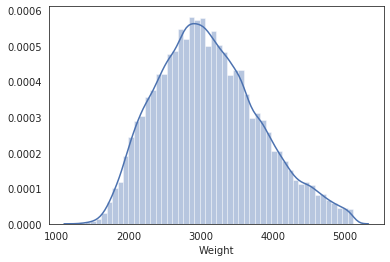

In [764]:
sns.distplot(weight_pd_clean['Weight'], color="b");


 mu = 8.02 and sigma = 0.23



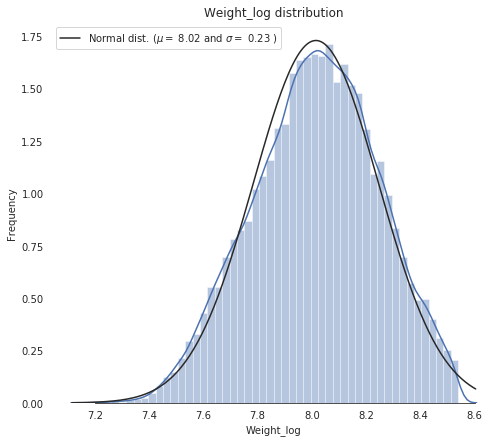

In [765]:
weight_pd_clean["Weight_log"] = np.log1p(weight_pd_clean["Weight"])
#nor_BMI_mean_bp = BMI_mean_bp
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(weight_pd_clean['Weight_log'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(weight_pd_clean['Weight_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Weight_log")
ax.set(title="Weight_log distribution")
sns.despine(trim=True, left=True)

plt.show()

In [766]:
weight_mean_bp = weight_pd_clean.groupby(['Deidentified_Pat_ID','WeightYear'])[['Weight']].mean()
weight_mean_bp.reset_index(level=1, inplace=True)
weight_mean_bp.reset_index(level=0, inplace=True)
weight_mean_bp.head()

,Deidentified_Pat_ID,WeightYear,Weight
0,MGVKKNZN,2018.0,2320.0
1,MGVNDNAK,2019.0,2872.0
2,MNAAOKVG,2016.0,2617.6
3,MNAAOKVG,2017.0,2691.2
4,MNAAOKVG,2019.0,2619.2


In [767]:
weight_mean_bp.shape

(30675, 3)

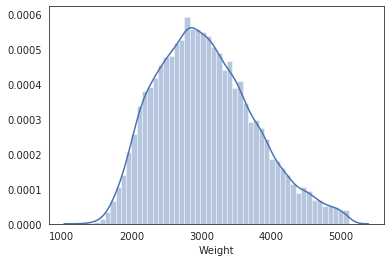

In [768]:
sns.distplot(weight_mean_bp['Weight'], color="b");

In [769]:
height_pd = data_pd[['Deidentified_Pat_ID','Height','HeightYear']]
height_pd.shape

(149216, 3)

In [770]:
height_pd = height_pd[(height_pd['Height'].notna())&(data_pd['HeightYear'].notna())]
height_pd.shape

(61206, 3)

In [771]:
Outliers_to_drop = detect_outliers(height_pd,0,["Height"])
len(Outliers_to_drop)

Q1 25.87
Q3 34.57
IQR 8.7
outlier_step 13.049999999999999
Q1 - outlier_step 12.820000000000002
Q3 + outlier_step 47.62
outliers: 1356


1356

In [772]:
# Drop outliers
height_pd_clean = height_pd.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
len(height_pd_clean)

59850

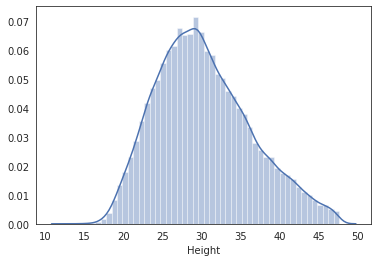

In [773]:
sns.distplot(height_pd_clean['Height'], color="b");

In [774]:
pd.Series(height_pd["HeightYear"].tolist()).sort_values().unique()

array([2014., 2015., 2016., 2017., 2018., 2019.])

In [775]:
height_mean_bp = height_pd.groupby(['Deidentified_Pat_ID','HeightYear'])[['Height']].mean()
height_mean_bp.reset_index(level=1, inplace=True)
height_mean_bp.reset_index(level=0, inplace=True)
height_mean_bp.head()

,Deidentified_Pat_ID,HeightYear,Height
0,MGVKKNZN,2018.0,23.41
1,MGVNDNAK,2019.0,23.69
2,MNAAOKVG,2017.0,24.13
3,MNADDANN,2016.0,27.83
4,MNADDANN,2017.0,28.90


In [776]:
height_mean_bp.shape

(25410, 3)

In [777]:
BMI_pd = data_pd[['Deidentified_Pat_ID','BMI','BMIYear']]
height_pd.shape

(61206, 3)

In [778]:
BMI_pd = BMI_pd[(BMI_pd['BMI'].notna())&(data_pd['BMIYear'].notna())]
BMI_pd.shape

(62755, 3)

In [779]:
Outliers_to_drop = detect_outliers(BMI_pd,0,["BMI"])
len(Outliers_to_drop)

Q1 64.0
Q3 69.5
IQR 5.5
outlier_step 8.25
Q1 - outlier_step 55.75
Q3 + outlier_step 77.75
outliers: 205


205

In [780]:
# Drop outliers
BMI_pd_clean = BMI_pd.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
len(BMI_pd_clean)

62550

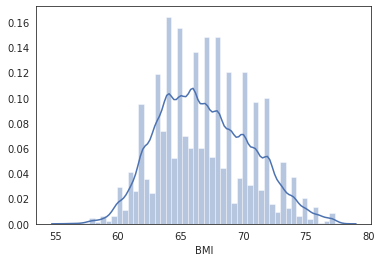

In [781]:
sns.distplot(BMI_pd_clean['BMI'], color="b");

In [782]:
BMI_mean_bp = BMI_pd.groupby(['Deidentified_Pat_ID','BMIYear'])[['BMI']].mean()
BMI_mean_bp.head()

BMI
Deidentified_Pat_ID BMIYear      
MGVKKNZN            2018.0   66.0
MGVNDNAK            2019.0   73.0
MNAAOKVG            2017.0   70.0
MNADDANN            2016.0   68.0
                    2017.0   68.0

In [783]:
BMI_mean_bp.shape

(25638, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3adbe44ba8>]],
      dtype=object)

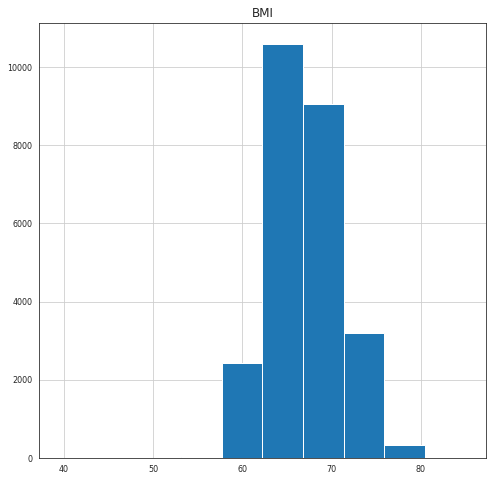

In [784]:
BMI_mean_bp.hist(xlabelsize=8,ylabelsize=8,figsize=(8,8))

In [785]:
BMI_mean_bp.reset_index(level=1, inplace=True)
BMI_mean_bp.reset_index(level=0, inplace=True)
BMI_mean_bp.head

<bound method NDFrame.head of       Deidentified_Pat_ID  BMIYear        BMI
0                MGVKKNZN   2018.0  66.000000
1                MGVNDNAK   2019.0  73.000000
2                MNAAOKVG   2017.0  70.000000
3                MNADDANN   2016.0  68.000000
4                MNADDANN   2017.0  68.000000
...                   ...      ...        ...
25633             ZZZZZTV   2015.0  62.756000
25634             ZZZZZTV   2016.0  63.250000
25635             ZZZZZTV   2017.0  63.178571
25636             ZZZZZTV   2018.0  62.930250
25637             ZZZZZTV   2019.0  62.665750

[25638 rows x 3 columns]>

In [786]:
len(BMI_mean_bp[BMI_mean_bp['BMIYear'].notna()])/len(BMI_mean_bp)

1.0

In [787]:
BMI_mean_bp.columns = ['Deidentified_Pat_ID','BMIYear','BMI']
BMI_mean_bp.head

<bound method NDFrame.head of       Deidentified_Pat_ID  BMIYear        BMI
0                MGVKKNZN   2018.0  66.000000
1                MGVNDNAK   2019.0  73.000000
2                MNAAOKVG   2017.0  70.000000
3                MNADDANN   2016.0  68.000000
4                MNADDANN   2017.0  68.000000
...                   ...      ...        ...
25633             ZZZZZTV   2015.0  62.756000
25634             ZZZZZTV   2016.0  63.250000
25635             ZZZZZTV   2017.0  63.178571
25636             ZZZZZTV   2018.0  62.930250
25637             ZZZZZTV   2019.0  62.665750

[25638 rows x 3 columns]>

In [788]:
BMI_mean_bp.dtypes

Deidentified_Pat_ID     object
BMIYear                float64
BMI                    float64
dtype: object


 mu = 66.98 and sigma = 3.75



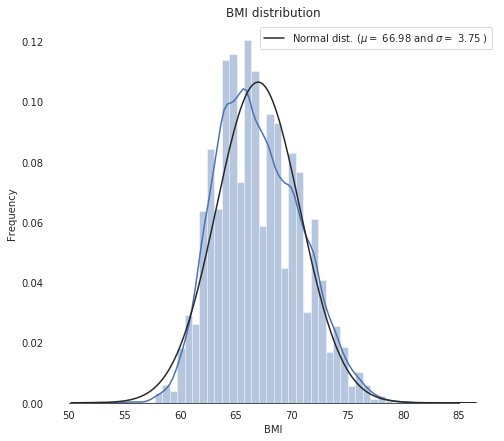

In [789]:
nor_BMI_mean_bp = BMI_mean_bp[BMI_mean_bp['BMI']>50]
#nor_BMI_mean_bp = BMI_mean_bp
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(nor_BMI_mean_bp['BMI'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nor_BMI_mean_bp['BMI'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)

plt.show()


 mu = 4.20 and sigma = 0.06



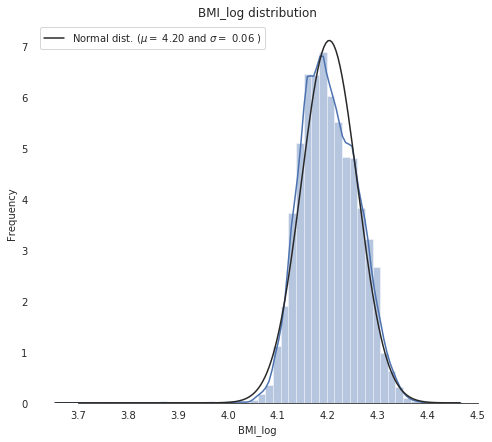

In [790]:
#nor_BMI_mean_bp = BMI_mean_bp[BMI_mean_bp['BMI']>55]
nor_BMI_mean_bp = BMI_mean_bp
nor_BMI_mean_bp["BMI_log"] = np.log(nor_BMI_mean_bp["BMI"])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(nor_BMI_mean_bp['BMI_log'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nor_BMI_mean_bp['BMI_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI_log")
ax.set(title="BMI_log distribution")
sns.despine(trim=True, left=True)

plt.show()

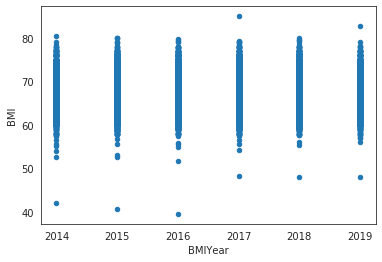

In [791]:
BMI_mean_bp.plot.scatter(y='BMI', x='BMIYear')

In [792]:
genome_header = '/mnt/volume1/T2D/header.txt'
def read_header(ps_folder):
    data_arr = []

    with open(ps_folder, 'r') as f:

        lines = f.readlines()

        for line in lines:

            if line != '\n':
                items = line.split(sep='\t')
                data_arr.extend(items)
            else:
                break

    print("--------------------------------")

    return data_arr

#genome_header_pd = pd.read_csv(genome_header, sep='\t', header=None)
head_list = read_header(genome_header)
head_pd = pd.DataFrame(head_list)
head_pd.columns = ['Deidentified_Pat_ID']
head_pd.shape

--------------------------------


(3910, 1)

In [793]:
pd.Series(BMI_mean_bp["BMIYear"].tolist()).sort_values().unique()

array([2014., 2015., 2016., 2017., 2018., 2019.])

In [794]:
target_BMI = BMI_mean_bp[BMI_mean_bp['BMIYear']==2018.]
len(target_BMI)

4960

In [795]:
res = pd.merge(target_BMI, head_pd, how='right',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
len(res)

3910

In [796]:
res.describe()

,BMIYear,BMI,BMI_log
count,3183.0,3183.000000,3183.000000
mean,2018.0,66.967604,4.202624
std,0.0,3.781115,0.056243
min,2018.0,48.000000,3.871201
25%,2018.0,64.000000,4.158883
50%,2018.0,66.709750,4.200351
75%,2018.0,69.661583,4.243649
max,2018.0,80.000000,4.382027


In [797]:
res = pd.merge(target_BMI, head_pd, how='inner',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
len(res)

3183

In [798]:
missing = percent_missing(res)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('Deidentified_Pat_ID', 0.0),
 ('BMIYear', 0.0),
 ('BMI', 0.0),
 ('BMI_log', 0.0)]

In [799]:
res.describe()

,BMIYear,BMI,BMI_log
count,3183.0,3183.000000,3183.000000
mean,2018.0,66.967604,4.202624
std,0.0,3.781115,0.056243
min,2018.0,48.000000,3.871201
25%,2018.0,64.000000,4.158883
50%,2018.0,66.709750,4.200351
75%,2018.0,69.661583,4.243649
max,2018.0,80.000000,4.382027


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3add35f828>,
      dtype=object)

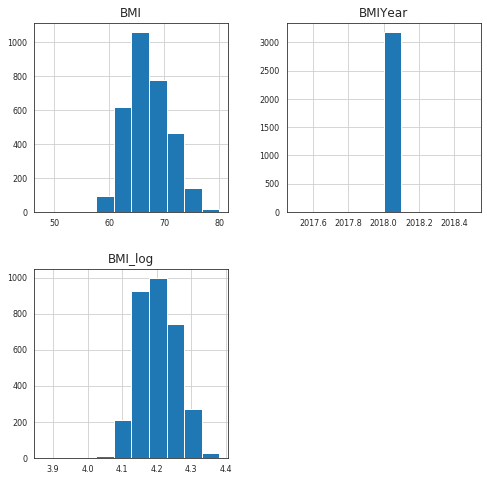

In [800]:
res.hist(xlabelsize=8,ylabelsize=8,figsize=(8,8))

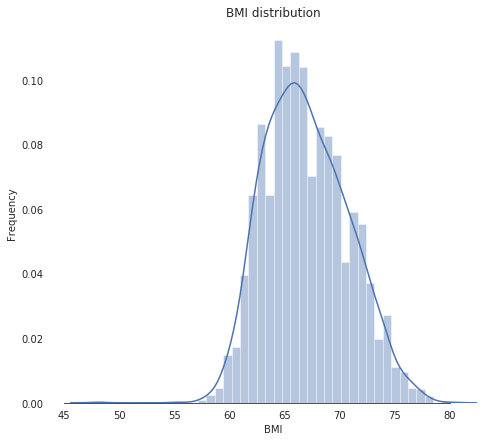

In [801]:

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

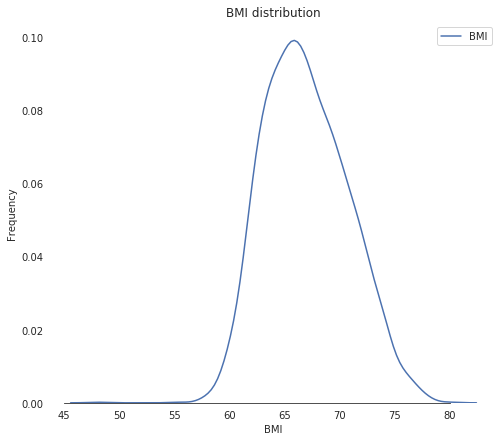

In [802]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.kdeplot(res['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

In [803]:
target_BMI = BMI_mean_bp
target_BMI.columns = ['Deidentified_Pat_ID','Year','BMI','BMI_log']
target_BMI.head()


,Deidentified_Pat_ID,Year,BMI,BMI_log
0,MGVKKNZN,2018.0,66.0,4.189655
1,MGVNDNAK,2019.0,73.0,4.290459
2,MNAAOKVG,2017.0,70.0,4.248495
3,MNADDANN,2016.0,68.0,4.219508
4,MNADDANN,2017.0,68.0,4.219508


In [804]:
target_Weight = weight_mean_bp
target_Weight.head()

,Deidentified_Pat_ID,WeightYear,Weight
0,MGVKKNZN,2018.0,2320.0
1,MGVNDNAK,2019.0,2872.0
2,MNAAOKVG,2016.0,2617.6
3,MNAAOKVG,2017.0,2691.2
4,MNAAOKVG,2019.0,2619.2


In [805]:
target_Weight = weight_mean_bp
target_Weight.columns = ['Deidentified_Pat_ID','Year','Weight']
target_Weight.head()


,Deidentified_Pat_ID,Year,Weight
0,MGVKKNZN,2018.0,2320.0
1,MGVNDNAK,2019.0,2872.0
2,MNAAOKVG,2016.0,2617.6
3,MNAAOKVG,2017.0,2691.2
4,MNAAOKVG,2019.0,2619.2


In [806]:
target_Height = height_mean_bp
target_Height.columns = ['Deidentified_Pat_ID','Year','Height']
target_Height.head()

,Deidentified_Pat_ID,Year,Height
0,MGVKKNZN,2018.0,23.41
1,MGVNDNAK,2019.0,23.69
2,MNAAOKVG,2017.0,24.13
3,MNADDANN,2016.0,27.83
4,MNADDANN,2017.0,28.90


In [807]:
target_Height.head()

,Deidentified_Pat_ID,Year,Height
0,MGVKKNZN,2018.0,23.41
1,MGVNDNAK,2019.0,23.69
2,MNAAOKVG,2017.0,24.13
3,MNADDANN,2016.0,27.83
4,MNADDANN,2017.0,28.90


In [808]:
res_all = pd.merge(target_BMI, head_pd, how='right',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
len(res_all)

16442

In [809]:
res_all.head()

,Deidentified_Pat_ID,Year,BMI,BMI_log
0,MGVKKNZN,2018.0,66.000000,4.189655
1,MNADOVKN,2016.0,72.000000,4.276666
2,MNADOVKN,2017.0,70.706667,4.258540
3,MNADOVKN,2018.0,71.530000,4.270117
4,MNAODHZZ,2016.0,74.000000,4.304065


In [810]:
len(res_all[res_all['Deidentified_Pat_ID'].notna()])/len(res_all),len(res_all[res_all['Year'].notna()])/len(res_all),len(res_all[res_all['BMI'].notna()])/len(res_all)

(1.0, 0.9954993309816325, 0.9954993309816325)

In [811]:
missing = percent_missing(res_all)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('Year', 0.45),
 ('BMI', 0.45),
 ('BMI_log', 0.45),
 ('Deidentified_Pat_ID', 0.0)]

In [812]:
len(pd.Series(res_all["Deidentified_Pat_ID"].tolist()).sort_values().unique())

3910

In [813]:
target_Weight.head()

,Deidentified_Pat_ID,Year,Weight
0,MGVKKNZN,2018.0,2320.0
1,MGVNDNAK,2019.0,2872.0
2,MNAAOKVG,2016.0,2617.6
3,MNAAOKVG,2017.0,2691.2
4,MNAAOKVG,2019.0,2619.2


In [814]:
res_all1 = pd.merge(target_Weight, res_all, how='right',on=['Deidentified_Pat_ID','Year'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
len(res_all1)

16442

In [815]:
res_all1.head()

,Deidentified_Pat_ID,Year,Weight,BMI,BMI_log
0,MGVKKNZN,2018.0,2320.0,66.000000,4.189655
1,MNADOVKN,2016.0,3380.8,72.000000,4.276666
2,MNADOVKN,2017.0,3424.0,70.706667,4.258540
3,MNADOVKN,2018.0,3267.2,71.530000,4.270117
4,MNAOGDAK,2017.0,3664.8,71.000000,4.262680


In [816]:
len(res_all1[res_all1['Weight'].notna()])/len(res_all1),len(res_all1[res_all1['Year'].notna()])/len(res_all1),len(res_all1[res_all1['BMI'].notna()])/len(res_all1)

(0.9847950371001095, 0.9954993309816325, 0.9954993309816325)

In [817]:
missing = percent_missing(res_all1)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('Weight', 1.52),
 ('Year', 0.45),
 ('BMI', 0.45),
 ('BMI_log', 0.45),
 ('Deidentified_Pat_ID', 0.0)]

In [818]:
res_all2 = pd.merge(target_Height, res_all1, how='right',on=['Deidentified_Pat_ID','Year'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
len(res_all2)

16442

In [819]:
res_all2.head()

,Deidentified_Pat_ID,Year,Height,Weight,BMI,BMI_log
0,MGVKKNZN,2018.0,23.410000,2320.0,66.000000,4.189655
1,MNADOVKN,2016.0,28.340000,3380.8,72.000000,4.276666
2,MNADOVKN,2017.0,30.106667,3424.0,70.706667,4.258540
3,MNADOVKN,2018.0,27.995000,3267.2,71.530000,4.270117
4,MNAODHZZ,2016.0,50.060000,NaN,74.000000,4.304065


In [820]:
len(res_all2[res_all2['Weight'].notna()])/len(res_all2),len(res_all2[res_all2['Height'].notna()])/len(res_all2),len(res_all2[res_all2['BMI'].notna()])/len(res_all2)

(0.9847950371001095, 0.9874102907188906, 0.9954993309816325)

In [821]:
missing = percent_missing(res_all2)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('Weight', 1.52),
 ('Height', 1.26),
 ('Year', 0.45),
 ('BMI', 0.45),
 ('BMI_log', 0.45),
 ('Deidentified_Pat_ID', 0.0)]

In [822]:
res_all2.describe()

,Year,Height,Weight,BMI,BMI_log
count,16368.000000,16235.000000,16192.000000,16368.000000,16368.000000
mean,2016.480327,30.064586,3051.804943,66.994239,4.203008
std,1.574870,8.919710,697.554255,3.795246,0.056521
min,2014.000000,15.260000,1320.000000,39.500000,3.676301
25%,2015.000000,25.410000,2526.700313,64.016000,4.159133
50%,2017.000000,29.070000,2993.061667,66.733700,4.200710
75%,2018.000000,33.520000,3496.200000,69.842500,4.246243
max,2019.000000,802.385714,5107.190000,80.350000,4.386392


In [823]:
res_all2.count().tail()

Year       16368
Height     16235
Weight     16192
BMI        16368
BMI_log    16368
dtype: int64

In [824]:
res_all2_missing = res_all2.isna()
res_all2_missing.head()

,Deidentified_Pat_ID,Year,Height,Weight,BMI,BMI_log
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False


In [825]:
res_all2_missing.dtypes

Deidentified_Pat_ID    bool
Year                   bool
Height                 bool
Weight                 bool
BMI                    bool
BMI_log                bool
dtype: object

In [826]:
res_all2_num_missing = res_all2_missing.sum()
res_all2_num_missing

Deidentified_Pat_ID      0
Year                    74
Height                 207
Weight                 250
BMI                     74
BMI_log                 74
dtype: int64

In [827]:
res_all2_num_missing / len(res_all2)

Deidentified_Pat_ID    0.000000
Year                   0.004501
Height                 0.012590
Weight                 0.015205
BMI                    0.004501
BMI_log                0.004501
dtype: float64

In [828]:
res_all2[res_all2['Year'].isna()].head()

,Deidentified_Pat_ID,Year,Height,Weight,BMI,BMI_log
16368,MNHVZHOT,NaN,NaN,NaN,NaN,NaN
16369,MNOAZATN,NaN,NaN,NaN,NaN,NaN
16370,ZDDKHODA,NaN,NaN,NaN,NaN,NaN
16371,ZDDVOGAZ,NaN,NaN,NaN,NaN,NaN
16372,ZDDZDTTH,NaN,NaN,NaN,NaN,NaN


In [829]:
res = pd.merge(target_BMI, head_pd, how='inner',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
len(res)

16368

In [830]:
data_pd.sort_values(['Deidentified_Pat_ID', 'WeightYear'], inplace=True)

In [831]:
data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last', inplace=True)
data_pd.reset_index(drop=True,inplace=True)

In [832]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(6157, 6157)

In [833]:
data_pd.describe()

,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
count,5637.000000,5654.000000,2415.000000,2415.000000,2911.000000,2935.000000
mean,3093.069172,2018.736823,29.680232,2018.660455,67.015456,2018.245997
std,754.294527,0.529744,6.230362,0.589037,3.742598,1.218522
min,1318.400000,2014.000000,14.620000,2014.000000,57.000000,2014.000000
25%,2547.200000,2019.000000,25.325000,2018.000000,64.016000,2018.000000
50%,3008.000000,2019.000000,28.780000,2019.000000,66.750000,2019.000000
75%,3539.200000,2019.000000,33.050000,2019.000000,69.665500,2019.000000
max,8048.000000,2019.000000,65.730000,2019.000000,79.500000,2019.000000


In [834]:
data_pd.to_csv(bp_file_p, index=False)

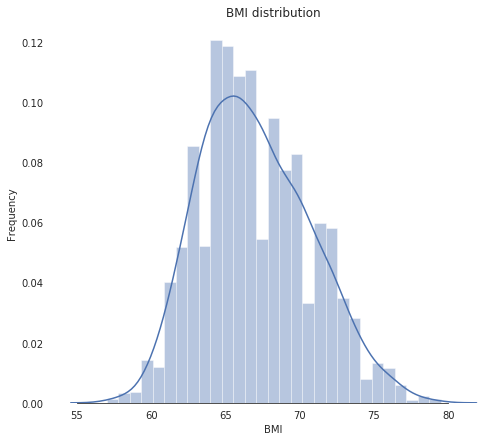

In [835]:
data_pd = data_pd[data_pd['BMI'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

In [836]:
genome_header = '/mnt/volume1/T2D/header.txt'
def read_header(ps_folder):
    data_arr = []

    with open(ps_folder, 'r') as f:

        lines = f.readlines()

        for line in lines:

            if line != '\n':
                items = line.split(sep='\t')
                data_arr.extend(items)
            else:
                break

    print("--------------------------------")

    return data_arr

#genome_header_pd = pd.read_csv(genome_header, sep='\t', header=None)
head_list = read_header(genome_header)
head_pd = pd.DataFrame(head_list)
head_pd.columns = ['Deidentified_Pat_ID']
head_pd.shape


--------------------------------


(3910, 1)

In [837]:
res = pd.merge(data_pd,head_pd, how='right',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
0,MGVKKNZN,2320.0,2018.0,23.41,2018.0,66.000,2018.0
1,MNAOGDAK,3376.0,2019.0,29.44,2019.0,70.984,2019.0
2,MNAZGATG,3340.8,2017.0,29.13,2017.0,71.000,2017.0
3,MNGDNAOA,4268.8,2019.0,43.08,2019.0,66.000,2019.0
4,MNGGAADT,3539.2,2019.0,30.86,2019.0,71.000,2019.0
